In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [23]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as axes

In [3]:
article1 = pd.read_csv('articles1.csv')
article1.rename(columns={'Unnamed: 0': 'Article_index'}, inplace=True) 
article1.set_index('Article_index', inplace=True)

article2 = pd.read_csv('articles2.csv')
article2.rename(columns={'Unnamed: 0': 'Article_index'}, inplace=True) 
article2.set_index('Article_index', inplace=True)

article3 = pd.read_csv('articles3.csv')
article3.rename(columns={'Unnamed: 0': 'Article_index'}, inplace=True) 
article3.set_index('Article_index', inplace=True)

In [4]:
article1.shape
article2.shape
article3.shape

(50000, 9)

(49999, 9)

(42571, 9)

In [5]:
frame = [article1,article2,article3]
articles = pd.concat(frame)

In [9]:
articles.head()

,id,title,publication,author,date,year,month,url,content
Article_index,,,,,,,,,
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [105]:
max(articles.index)

146032

In [10]:
articles['date_converted']=pd.to_datetime(articles['date'])

(535, 570)

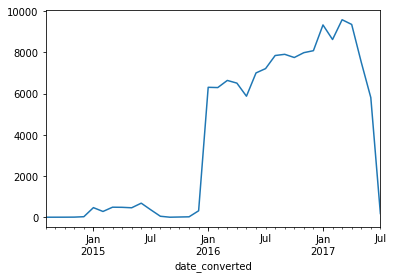

In [78]:
new_with_date = articles.set_index('date_converted')
new_with_date.resample('1M').count()['id'].plot()
#axes.Axes.get_xlim(new_with_date.resample('1M').count()['id'].plot())
plt.xlim([535,570])
plt.show()

In [104]:
max(articles['date_converted'])
min(articles['date_converted'])

Timestamp('2017-07-06 00:00:00')

Timestamp('2000-05-15 00:00:00')

In [90]:
import seaborn as sns

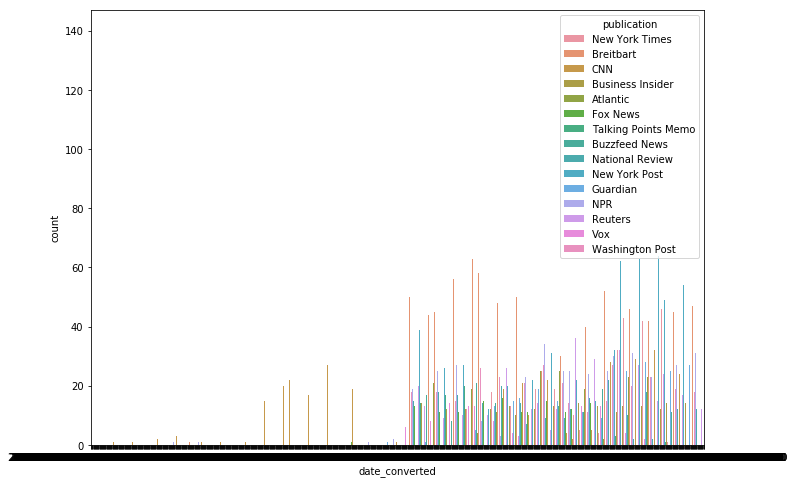

In [102]:
fig, ax = plt.subplots()
fig.set_size_inches(11,8)
sns.countplot(x="date_converted", hue="publication", data=articles, ax=ax)
plt.show()

In [6]:
articles.shape
articles.columns

(142570, 9)

Index(['id', 'title', 'publication', 'author', 'date', 'year', 'month', 'url',
       'content'],
      dtype='object')

In [7]:
publisher = articles.groupby('publication').count()
publisher

,id,title,author,date,year,month,url,content
publication,,,,,,,,
Atlantic,7179,7179,6199,7179,7179,7179,0,7179
Breitbart,23781,23781,23781,23781,23781,23781,0,23781
Business Insider,6757,6757,4950,6757,6757,6757,0,6757
Buzzfeed News,4854,4854,4853,4854,4854,4854,4854,4854
CNN,11488,11488,7025,11488,11488,11488,0,11488
Fox News,4354,4354,1117,4352,4352,4352,4351,4354
Guardian,8681,8681,7250,8641,8641,8641,8681,8681
NPR,11992,11992,11654,11992,11992,11992,11992,11992
National Review,6203,6203,6203,6203,6203,6203,6203,6203


In [8]:
sorted_by_publishers = publisher.sort_values('id', ascending=False)
sorted_by_publishers

,id,title,author,date,year,month,url,content
publication,,,,,,,,
Breitbart,23781,23781,23781,23781,23781,23781,0,23781
New York Post,17493,17493,17485,17493,17493,17493,17493,17493
NPR,11992,11992,11654,11992,11992,11992,11992,11992
CNN,11488,11488,7025,11488,11488,11488,0,11488
Washington Post,11114,11114,11077,11114,11114,11114,11114,11114
Reuters,10710,10709,10710,10710,10710,10710,10710,10710
Guardian,8681,8681,7250,8641,8641,8641,8681,8681
New York Times,7803,7803,7767,7803,7803,7803,0,7803
Atlantic,7179,7179,6199,7179,7179,7179,0,7179


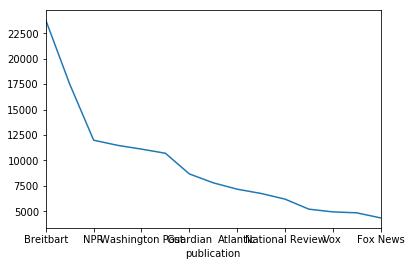

In [73]:
sorted_by_publishers.loc[:,'id'].plot()
plt.show()

In [74]:
author = articles.groupby('author').count()
author.shape

(15647, 9)

In [76]:
sorted_by_authors = author.sort_values('id', ascending=False)
sorted_by_authors

,id,title,publication,date,year,month,url,content,date_converted
author,,,,,,,,,
Breitbart News,1559,1559,1559,1559,1559,1559,0,1559,1559
Pam Key,1282,1282,1282,1282,1282,1282,0,1282,1282
Associated Press,1231,1231,1231,1224,1224,1224,1231,1231,1224
Charlie Spiering,928,928,928,928,928,928,0,928,928
Jerome Hudson,806,806,806,806,806,806,0,806,806
John Hayward,747,747,747,747,747,747,0,747,747
Daniel Nussbaum,735,735,735,735,735,735,0,735,735
AWR Hawkins,720,720,720,720,720,720,0,720,720
Ian Hanchett,647,647,647,647,647,647,0,647,647
